In [11]:
###
# inside acquire.py script:
from env import uname, pwd, host
import env
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###
######### USE THIS FOR THE zillow DATASET!!!!

def get_df():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    
    filename = "zillow.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename,index_col=False)
    else:
        sql_query = """
                SELECT  bedroomcnt as beds,
                    bathroomcnt as baths,
                    calculatedfinishedsquarefeet as sqft,
                    taxvaluedollarcnt as taxable_value,
                    yearbuilt as built,
                    taxamount as tax,
                    fips,
                    propertylandusetypeid
                FROM properties_2017
                WHERE propertylandusetypeid = 261
                """
    
        # Read in DataFrame from Codeup db.
        df = pd.read_sql(sql_query, env.get_db_url('zillow'))
        df.to_csv(filename,index=False)
        return df


#----------------------------------------------------

In [ ]:
df = get_df()
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
df.info()

## First, we drop the property land use id...then we can drop rows with missingness...
## and finally we can convert all floats to INT

In [3]:
###
def clean_zillow(df):
    '''
    clean_szillow will take in df and will remove propertyland..., rows with NULL values in any cell and will
    cast floats into int.
    
    args: df
    return: df (clean)
    
    '''
    df = df.drop(columns='propertylandusetypeid')
    df = df.dropna()
    df = df.astype(int)
    return df

In [ ]:
df = clean_zillow(df)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [7]:
###
from sklearn.model_selection import train_test_split

In [4]:
###
def split_zillow(df):
    train_val,test = train_test_split(df,
                                     random_state=2013,
                                     train_size=0.7)
    train, validate = train_test_split(train_val,
                                      random_state=2013,
                                      train_size=0.8)
    return train, validate, test

In [5]:
###
def wrangle_zillow():
    return split_zillow(
            clean_zillow(get_df()))

In [ ]:
df2 = wrangle_zillow()
df2

In [8]:
###
train,validate,test = wrangle_zillow()
train

,beds,baths,sqft,taxable_value,built,tax,fips
1941838,4,3,2015,209197,1941,2337,6037
1421974,4,2,1303,285279,1960,3029,6111
1346162,3,2,2128,374480,1950,4668,6111
1492536,2,2,1626,243656,1951,3211,6037
349555,3,2,1406,313183,1950,3879,6037
...,...,...,...,...,...,...,...
389482,2,1,742,329955,1928,4062,6037
677893,3,2,1155,438972,1958,5365,6037
1121893,3,1,1056,128151,1974,2119,6037
172656,5,3,2061,442589,1958,5092,6111


#### Simple Explore

In [9]:
train.shape,validate.shape,test.shape

((1198531, 7), (299633, 7), (642071, 7))

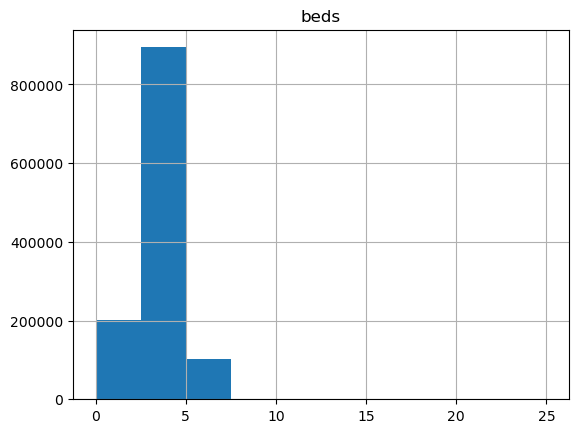

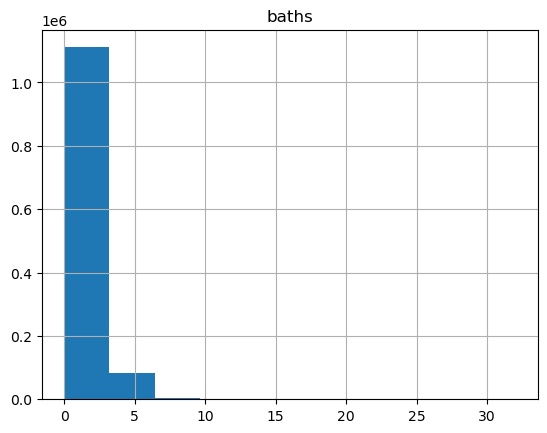

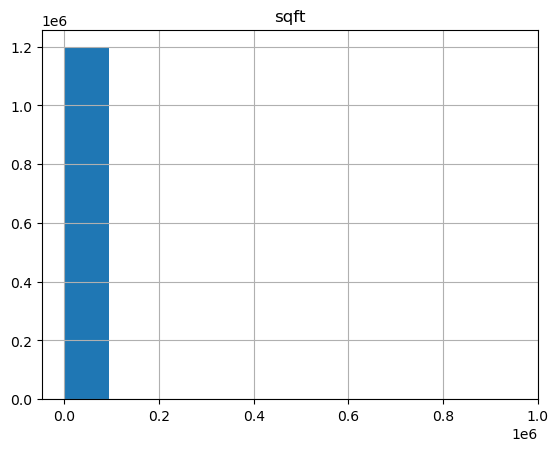

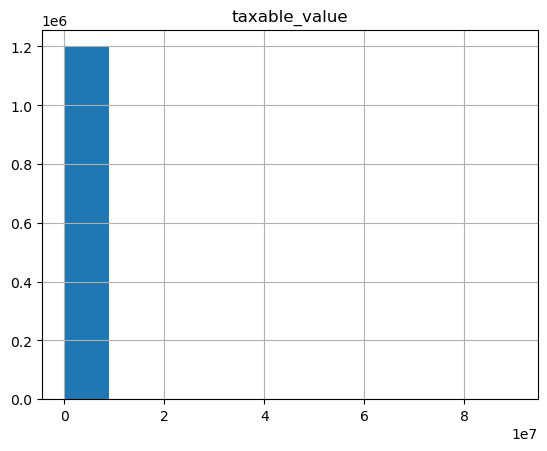

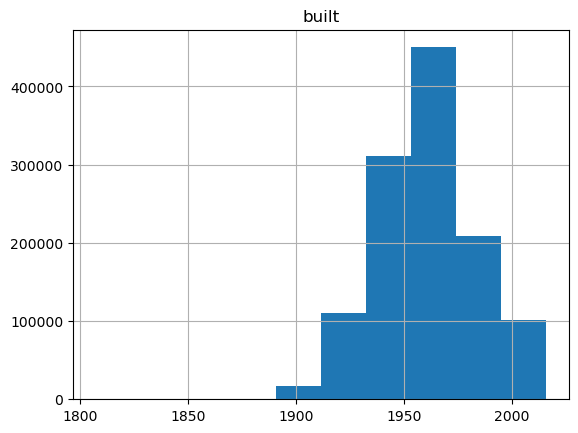

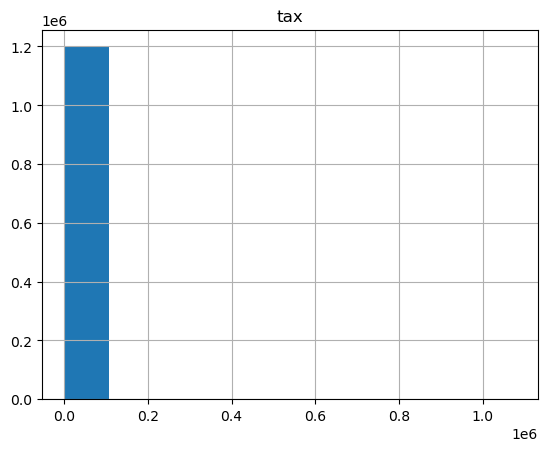

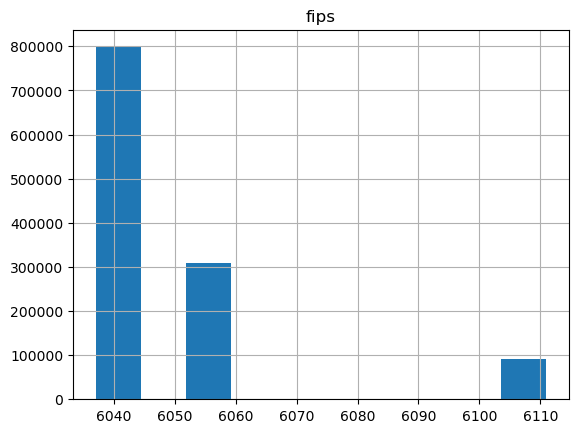

In [12]:
for col in train:
    train[col].hist()
    plt.title(col)
    plt.show()

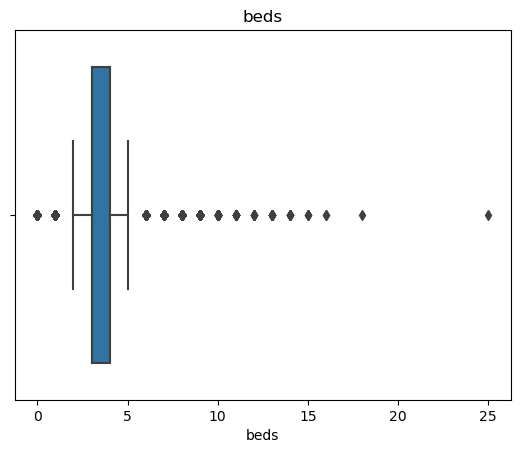

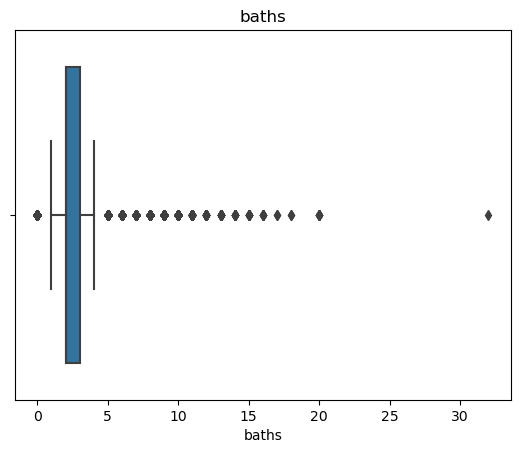

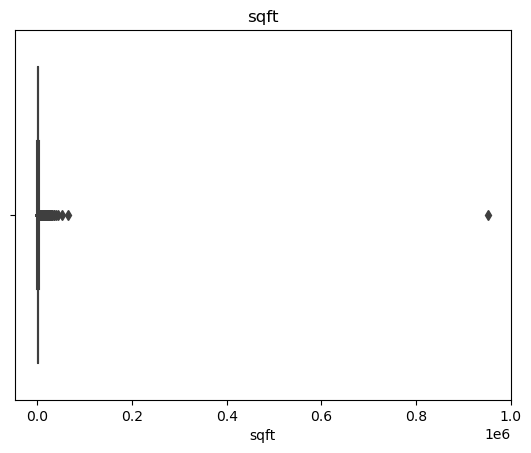

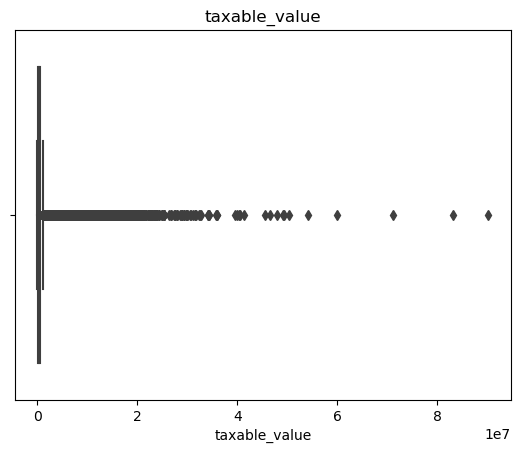

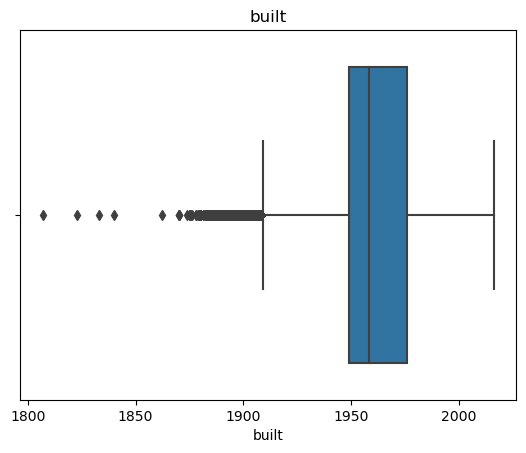

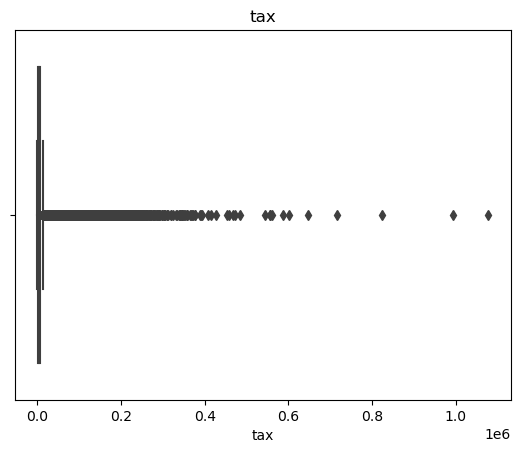

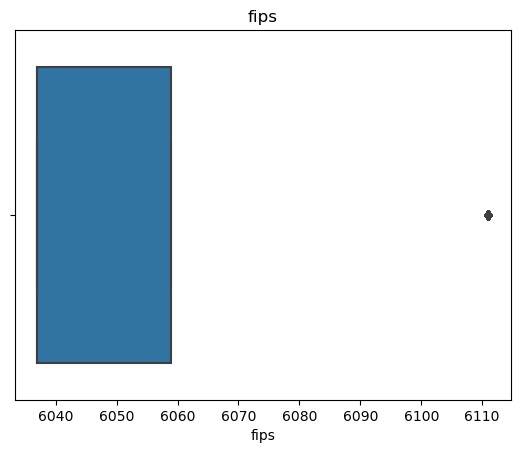

In [13]:
for col in train:
    sns.boxplot(data=train, x=col)
    plt.title(col)
    plt.show()

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1198531.0,3.302503,0.932741,0.0,3.0,3.0,4.0,25.0
baths,1198531.0,2.187564,0.974189,0.0,2.0,2.0,3.0,32.0
sqft,1198531.0,1863.990377,1302.229400,1.0,1258.0,1624.0,2208.0,952576.0
taxable_value,1198531.0,461157.127638,680416.869179,22.0,189084.5,328196.0,534461.0,90188462.0
built,1198531.0,1960.989782,22.156200,1807.0,1949.0,1958.0,1976.0,2016.0
tax,1198531.0,5621.940602,7844.115703,13.0,2540.0,4109.0,6411.0,1078101.0
fips,1198531.0,6048.337856,20.380593,6037.0,6037.0,6037.0,6059.0,6111.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1941838 to 2079094
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   beds           1198531 non-null  int64
 1   baths          1198531 non-null  int64
 2   sqft           1198531 non-null  int64
 3   taxable_value  1198531 non-null  int64
 4   built          1198531 non-null  int64
 5   tax            1198531 non-null  int64
 6   fips           1198531 non-null  int64
dtypes: int64(7)
memory usage: 73.2 MB


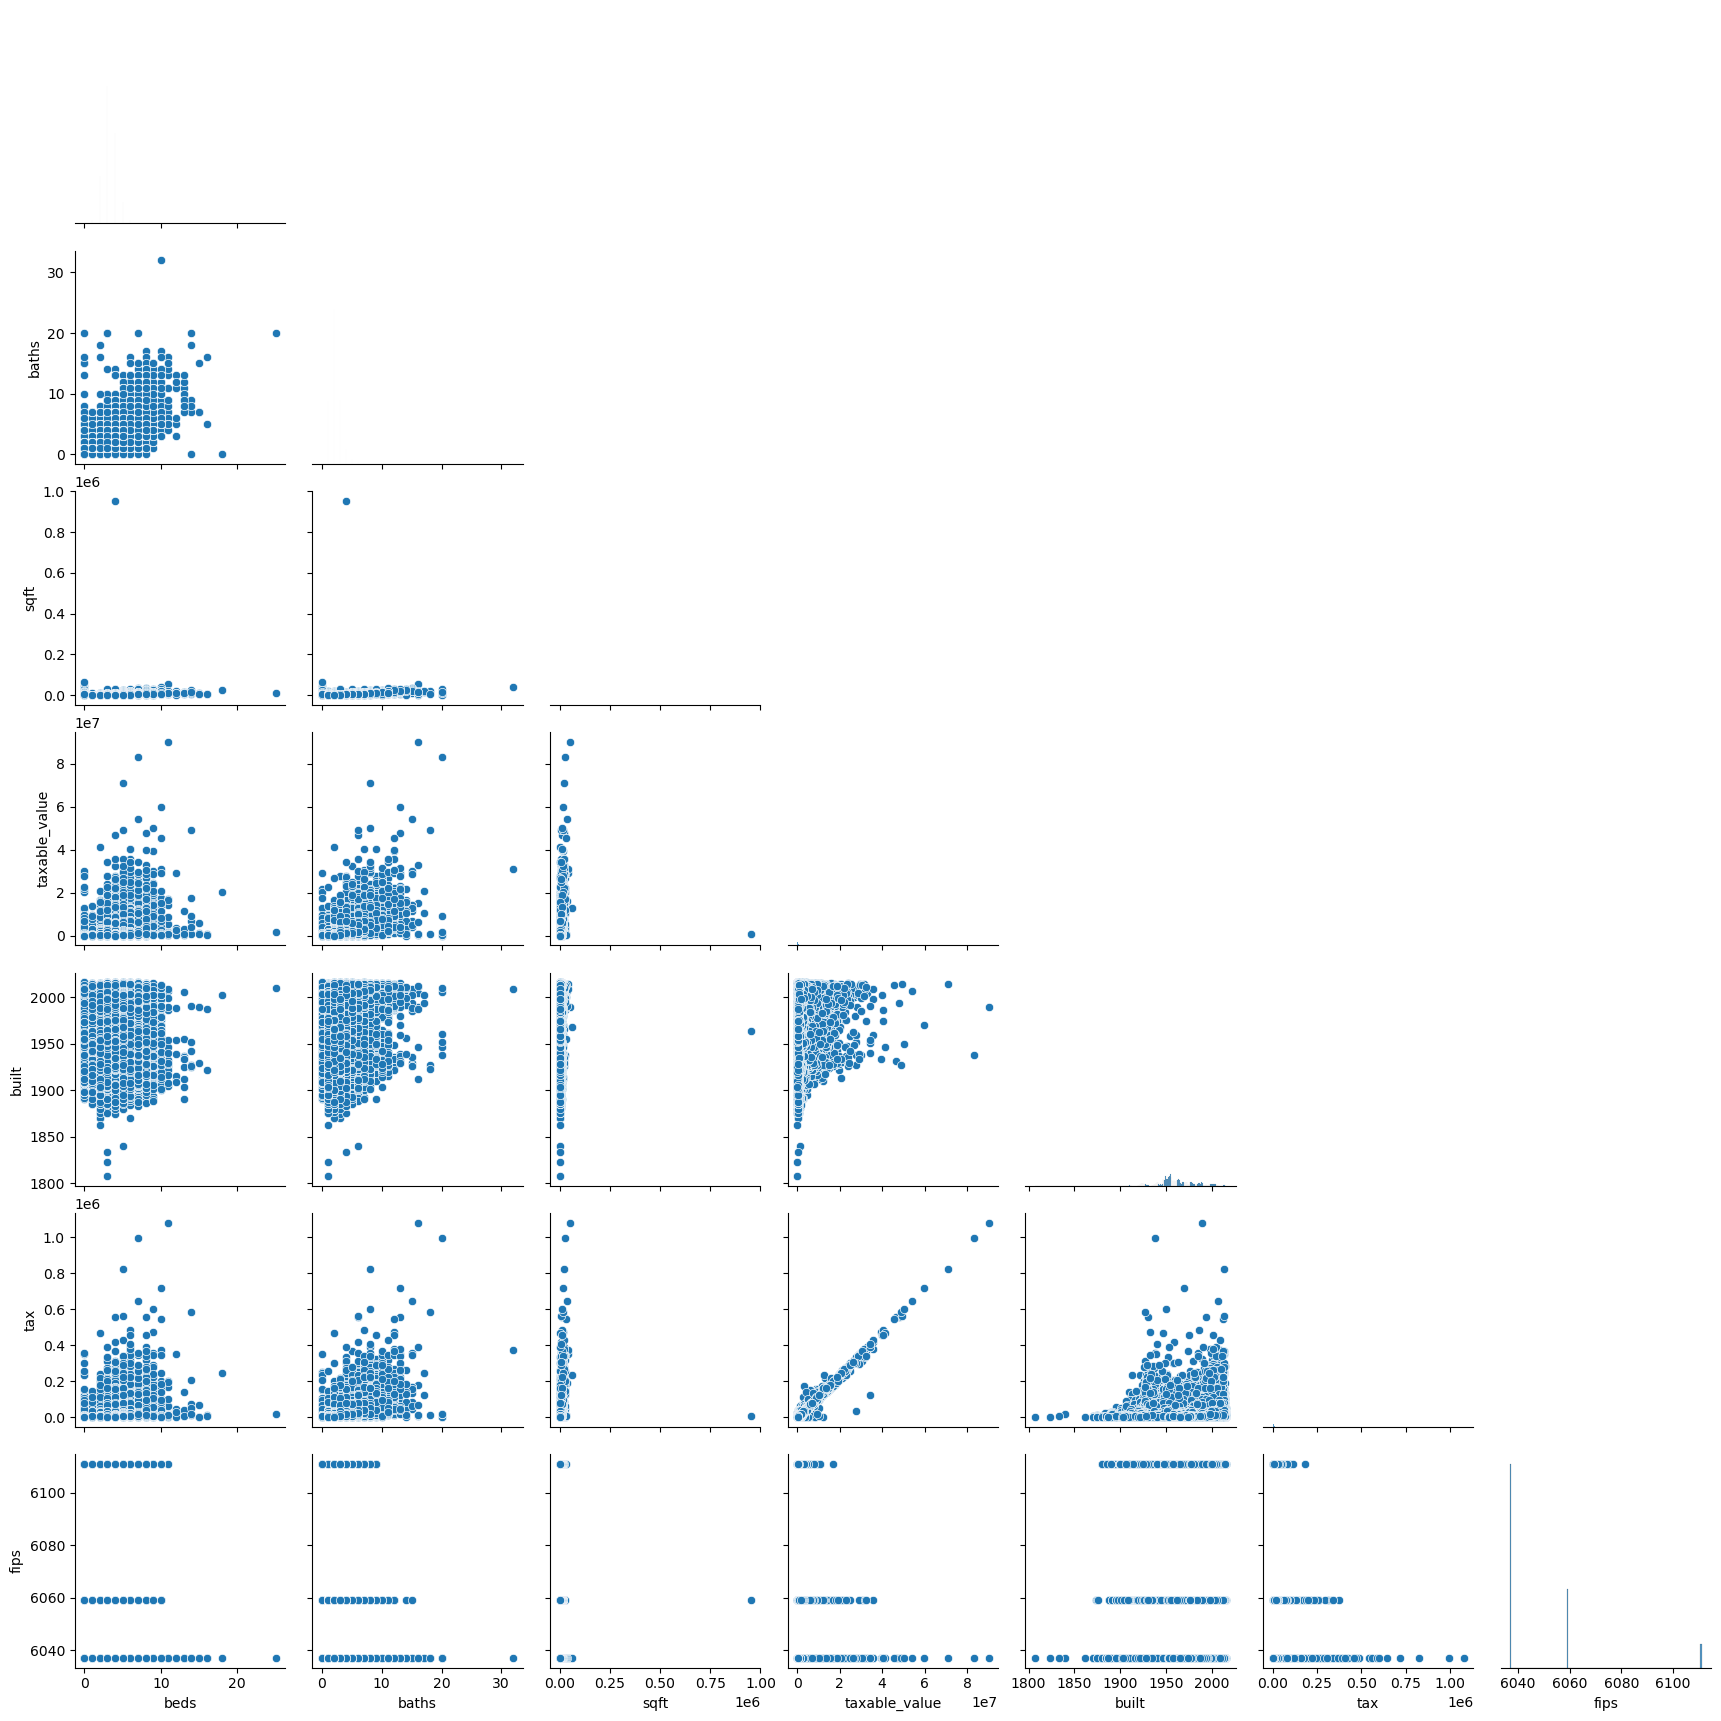

In [18]:
sns.pairplot(train,corner=True)
plt.show()